In [ ]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split
import torch.nn as nn
from torch.autograd import Variable
from statsmodels.graphics.tsaplots import plot_acf

**Implementation 1**:

**Create a new data frame where the features are the previous 100 values, and the label is the current value.**

In [ ]:
#read the csv file
df = pd.read_csv("rnn_dataset.csv")
df.head()

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0


In [ ]:
df.columns

Index(['Datetime', 'PJMW_MW'], dtype='object')

In [ ]:
#splitting the train, val and test data
df_train = df.iloc[:round(0.7*len(df))]
df_val   = df.iloc[round(0.7*len(df)): round(0.7*len(df))+ round(0.15*len(df))]
df_test  = df.iloc[round(0.7*len(df))+ round(0.15*len(df)):]

In [ ]:
from sklearn.preprocessing import StandardScaler
#normalizing the data for better performance
scaler = StandardScaler()

In [ ]:
df_train

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0
...,...,...
100239,2013-04-26 16:00:00,5072.0
100240,2013-04-26 17:00:00,4701.0
100241,2013-04-26 18:00:00,4820.0
100242,2013-04-26 19:00:00,4805.0


In [ ]:
df_train['PJMW_MW'] = scaler.fit_transform(np.array(df_train["PJMW_MW"]).reshape(-1,1))
df_train

<ipython-input-20-94c0ce925cae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['PJMW_MW'] = scaler.fit_transform(np.array(df_train["PJMW_MW"]).reshape(-1,1))


,Datetime,PJMW_MW
0,2002-12-31 01:00:00,-0.531409
1,2002-12-31 02:00:00,-0.675369
2,2002-12-31 03:00:00,-0.731702
3,2002-12-31 04:00:00,-0.760911
4,2002-12-31 05:00:00,-0.684758
...,...,...
100239,2013-04-26 16:00:00,-0.536625
100240,2013-04-26 17:00:00,-0.923649
100241,2013-04-26 18:00:00,-0.799509
100242,2013-04-26 19:00:00,-0.815157


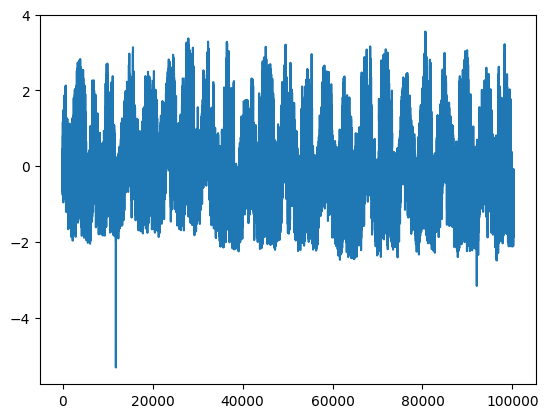

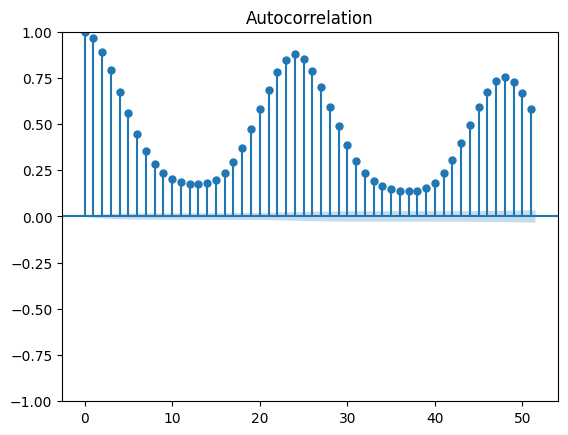

In [ ]:
#caluclating the Autocorrelation Function (ACF)

plt.plot(df_train['PJMW_MW'])
plt.show()
plot_acf(df_train['PJMW_MW'])
plt.show()

In [ ]:
df_val['PJMW_MW'] = scaler.transform(np.array(df_val["PJMW_MW"]).reshape(-1,1))
df_val

<ipython-input-22-f76ecd7140dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['PJMW_MW'] = scaler.transform(np.array(df_val["PJMW_MW"]).reshape(-1,1))


,Datetime,PJMW_MW
100244,2013-04-26 21:00:00,-0.561662
100245,2013-04-26 22:00:00,-0.629469
100246,2013-04-26 23:00:00,-0.894440
100247,2013-04-27 00:00:00,-1.271032
100248,2013-04-25 01:00:00,-1.329451
...,...,...
121720,2016-11-12 18:00:00,-0.293561
121721,2016-11-12 19:00:00,-0.169421
121722,2016-11-12 20:00:00,-0.145428
121723,2016-11-12 21:00:00,-0.141255


In [ ]:
df_test['PJMW_MW'] = scaler.transform(np.array(df_test["PJMW_MW"]).reshape(-1,1))
df_test

<ipython-input-23-dd18088ad613>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['PJMW_MW'] = scaler.transform(np.array(df_test["PJMW_MW"]).reshape(-1,1))


,Datetime,PJMW_MW
121725,2016-11-12 23:00:00,-0.409356
121726,2016-11-13 00:00:00,-0.586698
121727,2016-11-11 01:00:00,-1.053005
121728,2016-11-11 02:00:00,-1.119769
121729,2016-11-11 03:00:00,-1.230348
...,...,...
143201,2018-01-01 20:00:00,2.936161
143202,2018-01-01 21:00:00,2.906951
143203,2018-01-01 22:00:00,2.766120
143204,2018-01-01 23:00:00,2.474027


In [ ]:
data = np.array(df_train['PJMW_MW'], dtype = float).reshape(-1,1)
data = torch.tensor(data, dtype = torch.float)
data

tensor([[-0.5314],
        [-0.6754],
        [-0.7317],
        ...,
        [-0.7995],
        [-0.8152],
        [-0.8256]])

In [ ]:
#dataset class
class Dataset_PJMW_MW(Dataset):

  def __init__(self,input, seqlen):
    self.input = input
    self.seqlen = seqlen
    
  def __getitem__(self,idx):
    return self.input[idx:idx+self.seqlen], self.input[idx+self.seqlen]
  
  def __len__(self):
    return len(self.input) - self.seqlen

In [ ]:
#dataset and dataloaders for training

seqlen = 100
dataset_1 = Dataset_PJMW_MW(data,seqlen)
batch_size   = 100
dataloader_1 = DataLoader(dataset_1, batch_size = batch_size)


In [ ]:
import numpy as np
dataset_dummy =  Dataset_PJMW_MW(np.array(df['PJMW_MW'], dtype = float).reshape(-1,1),seqlen)
arr = []
labels_df = []
for input,label in dataset_dummy:
  arr.append(input)
  labels_df.append(label)

df_implementation_1 = pd.DataFrame(np.array(arr).reshape(143106,100))
df_implementation_1["label"] = np.array(labels_df)
df_implementation_1.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,5077.0,4939.0,4885.0,4857.0,4930.0,5126.0,5493.0,5824.0,5962.0,6019.0,...,6426.0,6359.0,6167.0,5868.0,5524.0,5628.0,5467.0,5402.0,5367.0,5485.0
1,4939.0,4885.0,4857.0,4930.0,5126.0,5493.0,5824.0,5962.0,6019.0,5988.0,...,6359.0,6167.0,5868.0,5524.0,5628.0,5467.0,5402.0,5367.0,5485.0,5695.0
2,4885.0,4857.0,4930.0,5126.0,5493.0,5824.0,5962.0,6019.0,5988.0,5885.0,...,6167.0,5868.0,5524.0,5628.0,5467.0,5402.0,5367.0,5485.0,5695.0,6069.0
3,4857.0,4930.0,5126.0,5493.0,5824.0,5962.0,6019.0,5988.0,5885.0,5764.0,...,5868.0,5524.0,5628.0,5467.0,5402.0,5367.0,5485.0,5695.0,6069.0,6365.0
4,4930.0,5126.0,5493.0,5824.0,5962.0,6019.0,5988.0,5885.0,5764.0,5612.0,...,5524.0,5628.0,5467.0,5402.0,5367.0,5485.0,5695.0,6069.0,6365.0,6569.0


In [ ]:
#dataset and dataloaders for validation

data_val = np.array(df_val['PJMW_MW'], dtype = float).reshape(-1,1)
data_val = torch.tensor(data, dtype = torch.float)

seqlen = 100
dataset_val_1 = Dataset_PJMW_MW(data_val,seqlen)

batch_size   = 1000
dataloader_val_1= DataLoader(dataset_val_1, batch_size = batch_size)


<ipython-input-28-9502c6c5821c>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_val = torch.tensor(data, dtype = torch.float)


In [ ]:
#dataset and dataloaders for testing

data = np.array(df_test['PJMW_MW'], dtype = float).reshape(-1,1)
data = torch.tensor(data, dtype = torch.float)
seqlen = 100
dataset_test = Dataset_PJMW_MW(data,seqlen)
batch_size   = 1
dataloader_test = DataLoader(dataset_test, batch_size = batch_size)


In [ ]:
#defining a RNN Model
class RNNModel(nn.Module):

  def __init__(self, input_size,HL_size,output_size = 1):
    super(RNNModel, self).__init__()
    self.input_size = input_size
    self.HL_size    = HL_size
    self.rnn = torch.nn.RNN(input_size=input_size,
                                hidden_size= HL_size,
                                num_layers=1,nonlinearity = 'relu',
                                bidirectional=False,
                                batch_first=True)
    self.fc = nn.Linear(HL_size, output_size)
    

  def forward(self,input):
    out,hidden_ = self.rnn(input)
    output      = self.fc(hidden_[0]) 
    return output



    

In [ ]:
#defining the LSTM_RNN Model
class LSTM_RNNModel(nn.Module):

  def __init__(self, input_size,HL_size,output_size = 1):
    super(LSTM_RNNModel, self).__init__()
    self.input_size = input_size
    self.HL_size    = HL_size
    self.rnn = torch.nn.LSTM(input_size=input_size,
                                hidden_size= HL_size,
                                num_layers=1,
                                bidirectional=False,
                                batch_first=True)
    self.fc = nn.Linear(HL_size, output_size)
    

  def forward(self,input):
    out,(hidden_,c_) = self.rnn(input)
    output      = self.fc(hidden_[0]) 
    return output



    

In [ ]:
LEARNING_RATE = 1e-5   #learning rate
loss_fn = nn.MSELoss() #this is a regression problem, thus the loss function is mean squared loss


In [ ]:
#training the RNN Model
device = "cuda" if torch.cuda.is_available() else "cpu"
num_epochs = 50
rnn = LSTM_RNNModel(1,32,1)
model = rnn.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)
loss_e = []
loss_val = []
for epoch in range(num_epochs):
  for input, label in dataloader_val_1:
     input = input.to(device)
     label = label.to(device)
     output = model(input)
     loss = loss_fn(output,label).detach().cpu().numpy() 
     loss_val.append(loss)
  for input, label in dataloader_1:
    input = input.to(device)
    label = label.to(device)
    def closure():
        optimizer.zero_grad()
        output = model(input)
        loss = loss_fn(output, label)
        loss_e.append(loss.detach().cpu().numpy())
        loss.backward()
        return loss
    optimizer.step(closure)



Text(0, 0.5, 'Loss')

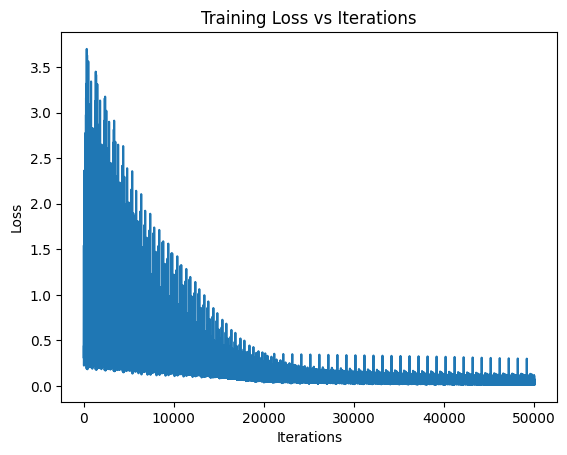

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_e)
plt.title("Training Loss vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

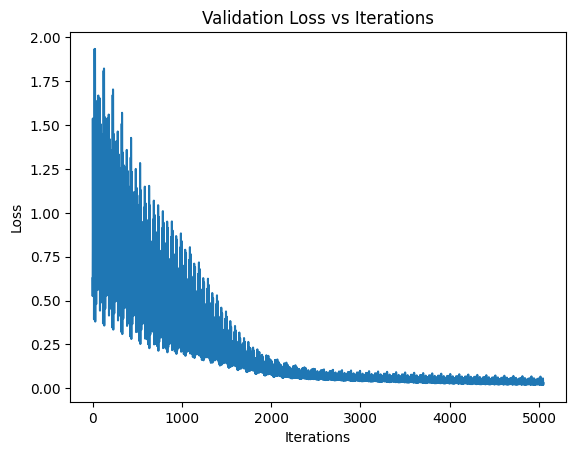

In [ ]:
plt.plot(loss_val)
plt.title("Validation Loss vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")

In [ ]:
#obtaining the predictions on test data set 
lab,pred,los = [],[],[]
for input, label in dataloader_test:
    input = input.to(device)
    label = label.to(device)
    prediction = model(input)
    loss = loss_fn(prediction, label)
    los.append(loss.item())
    lab.append(scaler.inverse_transform(label.detach().cpu().numpy())[0][0])
    pred.append(scaler.inverse_transform(prediction.detach().cpu().numpy())[0][0])


In [ ]:
#storing the predictions in test_set
test_set = pd.DataFrame([])
test_set["label"] =  lab
test_set["pred"]  =  pred
test_set["loss"]  =  (test_set["label"]-test_set["pred"])**2 

test_set

,label,pred,loss
0,4449.0,4505.459961,3187.727295
1,4475.0,4636.444824,26064.431641
2,4734.0,4706.592773,751.156067
3,5117.0,4961.435059,24200.451172
4,5653.0,5369.230957,80524.867188
...,...,...,...
21376,8401.0,8265.583008,18337.761719
21377,8373.0,8300.662109,5232.770508
21378,8238.0,8218.287109,388.598053
21379,7958.0,8033.756836,5739.098145


In [ ]:
#evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
print("Mean Squared error(MSE) loss : ", mean_squared_error(test_set["label"],test_set["pred"]))
print("Root Mean Squared error (RMSE) loss: ", (mean_squared_error(test_set["label"],test_set["pred"]))**0.5)
print("Mean absolute error(MAE) loss : ", mean_absolute_error(test_set["label"],test_set["pred"]))
print("Coefficient of determination (R2 score) is ", r2_score(test_set["label"],test_set["pred"]))

Mean Squared error(MSE) loss :  31748.012
Root Mean Squared error (RMSE) loss:  178.17971747297727
Mean absolute error(MAE) loss :  121.730774
Coefficient of determination (R2 score) is  0.9690594264063219


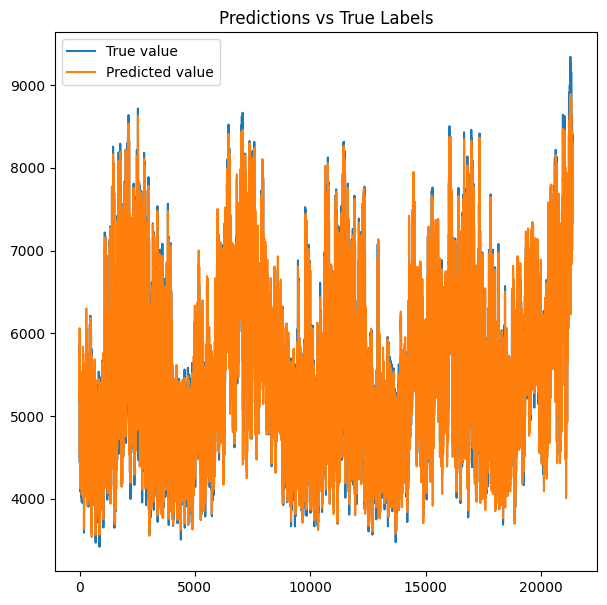

In [ ]:
plt.figure(figsize = (7,7))
plt.plot(test_set["label"],label = 'True value')
plt.plot(test_set['pred'],label = 'Predicted value')
plt.title("Predictions vs True Labels")
plt.legend()
plt.show()

**Implementation 2:**

**Instead of using the previous values as features, use the hour, day, day of the week, week of the year information, as
well as the periodicity information, along with checking whether the day is a holiday using the holiday module as
features to predict the current value using RNN.**

In [ ]:
df["Datetime"] = pd.to_datetime(df["Datetime"])
df = df.sort_values(by = "Datetime")
df.head()

,Datetime,PJMW_MW
6574,2002-04-01 01:00:00,4374.0
6575,2002-04-01 02:00:00,4306.0
6576,2002-04-01 03:00:00,4322.0
6577,2002-04-01 04:00:00,4359.0
6578,2002-04-01 05:00:00,4436.0


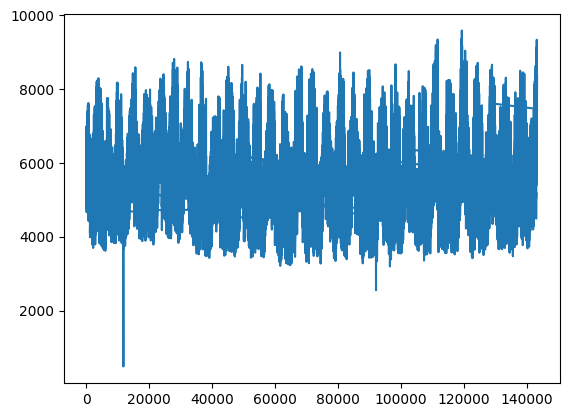

In [ ]:
plt.plot(df["PJMW_MW"])

In [ ]:
df_new = df.copy(deep = True)
df_new.head()

,Datetime,PJMW_MW
6574,2002-04-01 01:00:00,4374.0
6575,2002-04-01 02:00:00,4306.0
6576,2002-04-01 03:00:00,4322.0
6577,2002-04-01 04:00:00,4359.0
6578,2002-04-01 05:00:00,4436.0


In [ ]:
import holidays
holidays_India = holidays.IN()   #holidays.IN() is a list containing the dates of holidays for the country India

df_new["year"]  = df_new["Datetime"].dt.year
df_new["month"] = df_new["Datetime"].dt.month
df_new["hour"] = df_new["Datetime"].dt.hour
df_new["day"] = df_new["Datetime"].apply(lambda x: x.dayofyear)
df_new["day_of_week"] = df_new["Datetime"].dt.weekday
df_new["week_of_year"] = df_new["Datetime"].dt.isocalendar().week
df_new["is_holiday"] = df_new["Datetime"].apply(lambda x: int(x in holidays_India))  

df_new

,Datetime,PJMW_MW,year,month,hour,day,day_of_week,week_of_year,is_holiday
6574,2002-04-01 01:00:00,4374.0,2002,4,1,91,0,14,0
6575,2002-04-01 02:00:00,4306.0,2002,4,2,91,0,14,0
6576,2002-04-01 03:00:00,4322.0,2002,4,3,91,0,14,0
6577,2002-04-01 04:00:00,4359.0,2002,4,4,91,0,14,0
6578,2002-04-01 05:00:00,4436.0,2002,4,5,91,0,14,0
...,...,...,...,...,...,...,...,...,...
138090,2018-08-02 20:00:00,6545.0,2018,8,20,214,3,31,0
138091,2018-08-02 21:00:00,6496.0,2018,8,21,214,3,31,0
138092,2018-08-02 22:00:00,6325.0,2018,8,22,214,3,31,0
138093,2018-08-02 23:00:00,5892.0,2018,8,23,214,3,31,0


Inorder to include periodicity information two techniques have been used:

1. Cyclical encoding with sine/cosine transformation
2. Sesonal decomposition


In [ ]:
#Cyclical encoding with sine/cosine transformation 
from sklearn.preprocessing import FunctionTransformer

def sin_transformer(period):
	return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
	return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))


In [ ]:
#applying sine and cosine transformations to the features hour,day, day of week, week of year
df_new["hour_sin"] = sin_transformer(24).fit_transform(df_new["hour"])
df_new["hour_cos"] = cos_transformer(24).fit_transform(df_new["hour"])

df_new["day_sin"] = sin_transformer(365).fit_transform(df_new["day"])
df_new["day_cos"] = cos_transformer(365).fit_transform(df_new["day"])

df_new["day_of_week_sin"] = sin_transformer(7).fit_transform(df_new["day_of_week"])
df_new["day_of_week_cos"] = cos_transformer(7).fit_transform(df_new["day_of_week"])

df_new["week_of_year_sin"] = sin_transformer(52).fit_transform(df_new["week_of_year"])
df_new["week_of_year_cos"] = cos_transformer(52).fit_transform(df_new["week_of_year"])

df_new["month_sin"] = sin_transformer(12).fit_transform(df_new["month"])
df_new["month_cos"] = cos_transformer(12).fit_transform(df_new["month"])

df_new.head()

,Datetime,PJMW_MW,year,month,hour,day,day_of_week,week_of_year,is_holiday,hour_sin,hour_cos,day_sin,day_cos,day_of_week_sin,day_of_week_cos,week_of_year_sin,week_of_year_cos,month_sin,month_cos
6574,2002-04-01 01:00:00,4374.0,2002,4,1,91,0,14,0,0.258819,0.965926,0.999991,0.004304,0.0,1.0,0.992709,-0.120537,0.866025,-0.5
6575,2002-04-01 02:00:00,4306.0,2002,4,2,91,0,14,0,0.500000,0.866025,0.999991,0.004304,0.0,1.0,0.992709,-0.120537,0.866025,-0.5
6576,2002-04-01 03:00:00,4322.0,2002,4,3,91,0,14,0,0.707107,0.707107,0.999991,0.004304,0.0,1.0,0.992709,-0.120537,0.866025,-0.5
6577,2002-04-01 04:00:00,4359.0,2002,4,4,91,0,14,0,0.866025,0.500000,0.999991,0.004304,0.0,1.0,0.992709,-0.120537,0.866025,-0.5
6578,2002-04-01 05:00:00,4436.0,2002,4,5,91,0,14,0,0.965926,0.258819,0.999991,0.004304,0.0,1.0,0.992709,-0.120537,0.866025,-0.5


In [ ]:
df_new.columns

Index(['Datetime', 'PJMW_MW', 'year', 'month', 'hour', 'day', 'day_of_week',
       'week_of_year', 'is_holiday', 'hour_sin', 'hour_cos', 'day_sin',
       'day_cos', 'day_of_week_sin', 'day_of_week_cos', 'week_of_year_sin',
       'week_of_year_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [ ]:
scaler_2 = StandardScaler()
df_new["PJMW_MW"] = scaler_2.fit_transform(np.array(df_new["PJMW_MW"]).reshape(-1,1))

df_new

,Datetime,PJMW_MW,year,month,hour,day,day_of_week,week_of_year,is_holiday,hour_sin,hour_cos,day_sin,day_cos,day_of_week_sin,day_of_week_cos,week_of_year_sin,week_of_year_cos,month_sin,month_cos
6574,2002-04-01 01:00:00,-1.254546,2002,4,1,91,0,14,0,0.258819,0.965926,0.999991,0.004304,0.000000,1.000000,0.992709,-0.120537,0.866025,-0.5
6575,2002-04-01 02:00:00,-1.323994,2002,4,2,91,0,14,0,0.500000,0.866025,0.999991,0.004304,0.000000,1.000000,0.992709,-0.120537,0.866025,-0.5
6576,2002-04-01 03:00:00,-1.307653,2002,4,3,91,0,14,0,0.707107,0.707107,0.999991,0.004304,0.000000,1.000000,0.992709,-0.120537,0.866025,-0.5
6577,2002-04-01 04:00:00,-1.269865,2002,4,4,91,0,14,0,0.866025,0.500000,0.999991,0.004304,0.000000,1.000000,0.992709,-0.120537,0.866025,-0.5
6578,2002-04-01 05:00:00,-1.191225,2002,4,5,91,0,14,0,0.965926,0.258819,0.999991,0.004304,0.000000,1.000000,0.992709,-0.120537,0.866025,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138090,2018-08-02 20:00:00,0.962708,2018,8,20,214,3,31,0,-0.866025,0.500000,-0.516062,-0.856551,0.433884,-0.900969,-0.568065,-0.822984,-0.866025,-0.5
138091,2018-08-02 21:00:00,0.912664,2018,8,21,214,3,31,0,-0.707107,0.707107,-0.516062,-0.856551,0.433884,-0.900969,-0.568065,-0.822984,-0.866025,-0.5
138092,2018-08-02 22:00:00,0.738020,2018,8,22,214,3,31,0,-0.500000,0.866025,-0.516062,-0.856551,0.433884,-0.900969,-0.568065,-0.822984,-0.866025,-0.5
138093,2018-08-02 23:00:00,0.295795,2018,8,23,214,3,31,0,-0.258819,0.965926,-0.516062,-0.856551,0.433884,-0.900969,-0.568065,-0.822984,-0.866025,-0.5


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

#seasonal decomposition of features
result_hour = seasonal_decompose(df_new['PJMW_MW'], model='Additive', period=24)
result_day = seasonal_decompose(df_new['PJMW_MW'], model='Additive', period=8735)
result_day_of_week = seasonal_decompose(df_new['PJMW_MW'], model='Additive', period=145)
result_week  = seasonal_decompose(df_new['PJMW_MW'], model='Additive', period=8567)
result_month  = seasonal_decompose(df_new['PJMW_MW'], model='Additive', period=8015)
result_acf  = seasonal_decompose(df_new['PJMW_MW'], model='Additive', period=25)


In [ ]:
df_new["seasonal_hour"] =  result_hour.seasonal
df_new["seasonal_day"] = result_day.seasonal
df_new["seasonal_day_of_week"] = result_day_of_week.seasonal
df_new["seasonal_week"] = result_week.seasonal
df_new["seasonal_month"] = result_month.seasonal
df_new["seasonal_acf"] =result_acf.seasonal

In [ ]:
df_new.head()

,Datetime,PJMW_MW,year,month,hour,day,day_of_week,week_of_year,is_holiday,hour_sin,...,week_of_year_sin,week_of_year_cos,month_sin,month_cos,seasonal_hour,seasonal_day,seasonal_day_of_week,seasonal_week,seasonal_month,seasonal_acf
6574,2002-04-01 01:00:00,-1.254546,2002,4,1,91,0,14,0,0.258819,...,0.992709,-0.120537,0.866025,-0.5,-0.274046,0.065216,0.001933,0.537081,0.008191,0.000563
6575,2002-04-01 02:00:00,-1.323994,2002,4,2,91,0,14,0,0.500000,...,0.992709,-0.120537,0.866025,-0.5,-0.284865,0.082570,-0.001716,0.568551,0.109768,0.000409
6576,2002-04-01 03:00:00,-1.307653,2002,4,3,91,0,14,0,0.707107,...,0.992709,-0.120537,0.866025,-0.5,-0.272529,0.111701,-0.004813,0.597727,0.211404,0.000927
6577,2002-04-01 04:00:00,-1.269865,2002,4,4,91,0,14,0,0.866025,...,0.992709,-0.120537,0.866025,-0.5,-0.215553,0.151454,-0.006735,0.632203,0.286426,0.001593
6578,2002-04-01 05:00:00,-1.191225,2002,4,5,91,0,14,0,0.965926,...,0.992709,-0.120537,0.866025,-0.5,-0.115290,0.195905,-0.008183,0.711745,0.410471,0.001371


In [ ]:
#splitting the train, val and test data
df_train_2 = df_new[:round(0.7*len(df_new))]
df_val_2   = df_new[round(0.7*len(df_new)): round(0.7*len(df_new))+round(0.15*len(df_new))]
df_test_2  = df_new[round(0.7*len(df_new))+round(0.15*len(df_new)):]

In [ ]:
#checking NaN values in the dataframe
df_new.isna().sum()

Datetime                0
PJMW_MW                 0
year                    0
month                   0
hour                    0
day                     0
day_of_week             0
week_of_year            0
is_holiday              0
hour_sin                0
hour_cos                0
day_sin                 0
day_cos                 0
day_of_week_sin         0
day_of_week_cos         0
week_of_year_sin        0
week_of_year_cos        0
month_sin               0
month_cos               0
seasonal_hour           0
seasonal_day            0
seasonal_day_of_week    0
seasonal_week           0
seasonal_month          0
seasonal_acf            0
dtype: int64

In [ ]:
df_new.columns

Index(['Datetime', 'PJMW_MW', 'year', 'month', 'hour', 'day', 'day_of_week',
       'week_of_year', 'is_holiday', 'hour_sin', 'hour_cos', 'day_sin',
       'day_cos', 'day_of_week_sin', 'day_of_week_cos', 'week_of_year_sin',
       'week_of_year_cos', 'month_sin', 'month_cos', 'seasonal_hour',
       'seasonal_day', 'seasonal_day_of_week', 'seasonal_week',
       'seasonal_month', 'seasonal_acf'],
      dtype='object')

In [ ]:
#dataset class
class Dataset_PJMW_MW_2(Dataset):

  def __init__(self,input, seqlen):
    self.input = torch.tensor(np.array(input.drop(columns = ['Datetime', 'PJMW_MW',"year","month"], axis  = 1),dtype = float),dtype = torch.float)
    self.label = torch.tensor(np.array(input["PJMW_MW"], dtype = float).reshape(-1,1),dtype = torch.float)
    self.seqlen = seqlen
    
  def __getitem__(self,idx):
    return self.input[idx:idx+self.seqlen], self.label[idx+self.seqlen]
  
  def __len__(self):
    return len(self.input) - self.seqlen

In [ ]:
#dataset and dataloaders for training
seqlen = 100
dataset_train_2 = Dataset_PJMW_MW_2(df_train_2,seqlen)

batch_size   = 100
dataloader_train_2= DataLoader(dataset_train_2, batch_size = batch_size)


In [ ]:
#dataset and dataloaders for validation

seqlen = 100
dataset_val_2 = Dataset_PJMW_MW_2(df_val_2,seqlen)

batch_size   = 1000
dataloader_val_2= DataLoader(dataset_val_2, batch_size = batch_size)



In [ ]:
#dataset and dataloaders for testing
seqlen = 100
dataset_test_2 = Dataset_PJMW_MW_2(df_test_2,seqlen)

batch_size   = 1
dataloader_test_2= DataLoader(dataset_test_2, batch_size = batch_size)


In [ ]:
i = 0
for input,label in dataset_train_2:
  if i>0:
    break
  i+=1
  print(input.shape)
  print("INput: ",input)
  print("label:", label)

torch.Size([100, 21])
INput:  tensor([[ 1.0000e+00,  9.1000e+01,  0.0000e+00,  ...,  5.3708e-01,
          8.1906e-03,  5.6281e-04],
        [ 2.0000e+00,  9.1000e+01,  0.0000e+00,  ...,  5.6855e-01,
          1.0977e-01,  4.0949e-04],
        [ 3.0000e+00,  9.1000e+01,  0.0000e+00,  ...,  5.9773e-01,
          2.1140e-01,  9.2696e-04],
        ...,
        [ 2.0000e+00,  9.5000e+01,  4.0000e+00,  ...,  7.3492e-01,
         -1.2689e-01,  1.1462e-03],
        [ 3.0000e+00,  9.5000e+01,  4.0000e+00,  ...,  7.5203e-01,
         -2.9816e-02, -7.4418e-04],
        [ 4.0000e+00,  9.5000e+01,  4.0000e+00,  ...,  7.5376e-01,
          3.4157e-02,  8.5516e-05]])
label: tensor([-0.4395])


In [ ]:
#training the RNN Model
LEARNING_RATE = 1e-3
loss_fn = nn.MSELoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
num_epochs = 50
rnn1 = LSTM_RNNModel(21,32,1)
model = rnn1.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)
loss_e = []
loss_val = []
for epoch in range(num_epochs):
  #validation loss
   for input, label in dataloader_val_2:
     input = input.to(device)
     label = label.to(device)
     output = model(input)
     loss = loss_fn(output,label).detach().cpu().numpy() 
     loss_val.append(loss)
  #training
   for input, label in dataloader_train_2:
    input = input.to(device)
    label = label.to(device)
    def closure():
        optimizer.zero_grad()
        output = model(input)
        loss = loss_fn(output,label)
        loss_e.append(loss.detach().cpu().numpy())
        loss.backward()
        return loss
    optimizer.step(closure)



Text(0, 0.5, 'Loss')

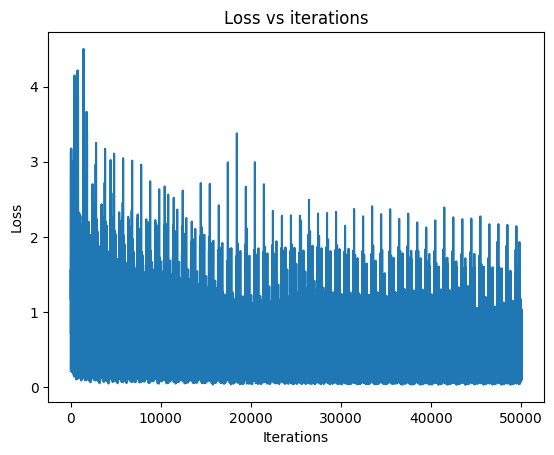

In [ ]:
plt.plot(loss_e)
plt.title("Loss vs iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

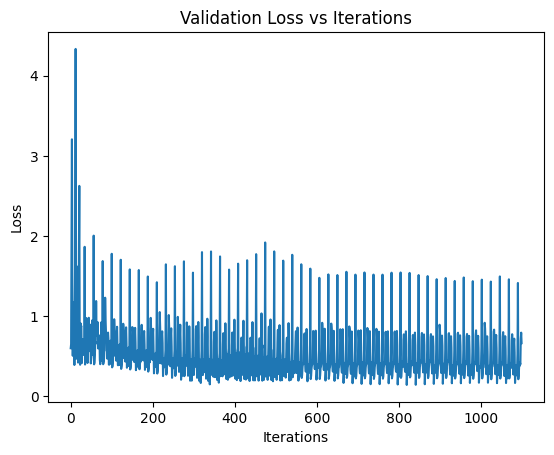

In [ ]:
plt.plot(loss_val)
plt.title("Validation Loss vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")

In [ ]:
#obtaining the predictions on test data set
lab,pred,los = [],[],[]
for input, label in dataloader_test_2:
    input = input.to(device)
    label = label.to(device)
    prediction = model(input)
    loss = loss_fn(prediction, label)
    los.append(loss.item())
    lab.append(scaler_2.inverse_transform(label.detach().cpu().numpy())[0][0])
    pred.append(scaler_2.inverse_transform(prediction.detach().cpu().numpy())[0][0])

In [ ]:
#storing the predictions in test_set_2
test_set_2 = pd.DataFrame([])
test_set_2["label"] =  lab
test_set_2["pred"]  =  pred
test_set_2["loss"]  =  (test_set_2["label"]-test_set_2["pred"])**2 

In [ ]:
#evaluation metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
r2 = r2_score(test_set_2["label"],test_set_2["pred"]) 
print("Mean Squared error(MSE) loss : ", mean_squared_error(test_set_2["label"],test_set_2["pred"]))
print("Root Mean squared error (RMSE) loss: ", (mean_squared_error(test_set_2["label"],test_set_2["pred"]))**0.5)
print("Mean absolute error (MAE): ",mean_absolute_error(test_set_2["label"],test_set_2["pred"]) )
print("Coefficient of determination R2 score is ", r2)

Mean Squared error(MSE) loss :  452924.56
Root Mean squared error (RMSE) loss:  672.9967031865758
Mean absolute error (MAE):  520.6381
Coefficient of determination R2 score is  0.5357126920520561


In [ ]:
test_set_2

,label,pred,loss
0,5160.0,5667.977539,258041.187500
1,5178.0,5668.987305,241068.531250
2,5301.0,5733.998047,187487.312500
3,5652.0,5930.958984,77818.117188
4,6202.0,6212.476562,109.758362
...,...,...,...
21376,6545.0,6837.734375,85693.414062
21377,6496.0,6786.816895,84574.468750
21378,6325.0,6520.043945,38042.140625
21379,5892.0,5971.769043,6363.100098


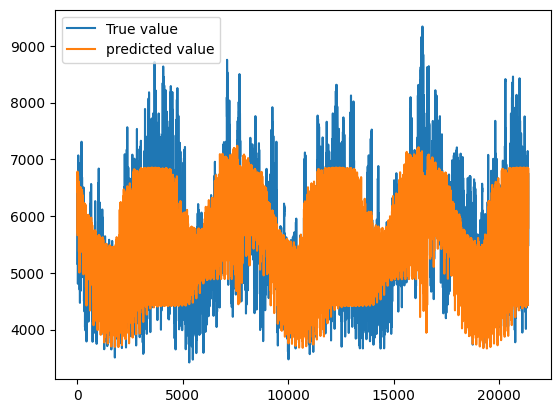

In [ ]:
plt.plot(test_set_2["label"], label = 'True value')
plt.plot(test_set_2["pred"], label = "predicted value")
plt.legend()
plt.show()

**Conclusion:**

Therefore, by comparing the performance of both implementations with different feature engineering methods, the first RNN implementation, where we predict the current value using the previous 100 values, works much better compared to the second method in predicting the current label.  The first implementation gave a R2 score of 0.969, where as the second implementation gave a R2 score of 0.535.
The below table shows the comparision of two feature engineering methods:



| |Feature engineering method - 1  | Feature engineering method - 2|
|--|-----------------------------|----------------------|
|Mean Squared error(MSE)|31748.012| 452924.56|
|Root Mean squared error (RMSE)|178.17971747297727|672.9967031865758|
|Mean absolute error (MAE)|121.730774| 520.6381|
|R2 score| 0.9690594264063219|0.5357126920520561|

Thus, the first feature engineering method outperformed the second feature engineering method in all the evaluation metrics. Thus, for the given dataset first feature engineering method works very well.